# Упражнение 5 - допълнителни задачи

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Задача 1

Характерно за някои видове химични реакции, зависещи от киселинността на средата, в която протичат е, че тази киселинност се изменя синусоидално в рамките на денонощието. Такива са например някои каталитични процеси (напр. производството на биогорива), разлагане на органична материя от някои видове микроорганизми и др. \
В таблицата са дадени измервания на киселинността в един химичен реактор в няколко момента от денононщието: 


|  t, h  |  2 | 5 | 7 | 11 | 14 | 16 | 18 | 21 | 24 |
| --- | --- | --- | --- | --- | --- |  --- |--- | --- | --- |
| pH|  7 | 7.1 | 7.4 | 8.2 | 8.9 | 8.4 | 7.9 | 7.3 | 7


Да се интерполират данните от таблицата с обощен полином по подходяща система от функции. Като се използва така намерения полином, да се намери максималната стойност на pH в реактора и часът, в който тя се достига. Периодът на разглеждания процес е 24 часа.

In [29]:
#change the period in [0,2pi]
t = np.array([2, 5, 7, 11, 14, 16, 18, 21, 24])
t_changed = (2 * np.pi) / 24 * t
pH = np.array([7, 7.1, 7.4, 8.2, 8.9, 8.4, 7.9, 7.3, 7])

n = pH.size

In [31]:
A = np.ones([n,n])
def fill_trigonometry_matrix(A, t, n):
    for i in range(n):
        for j in range(1, n):
            if (j % 2 != 0):
                A[i][j] = np.cos((math.floor(j / 2) + 1) * t[i])
            else:
                A[i][j] = np.sin(j / 2 * t[i])

fill_trigonometry_matrix(A, t_changed, n)

In [33]:
sol = np.linalg.solve(A, pH)
sol

array([ 7.66975634, -0.76153181, -0.40864232,  0.10889623,  0.1883828 ,
       -0.03379128, -0.08617295,  0.01667052,  0.08196816])

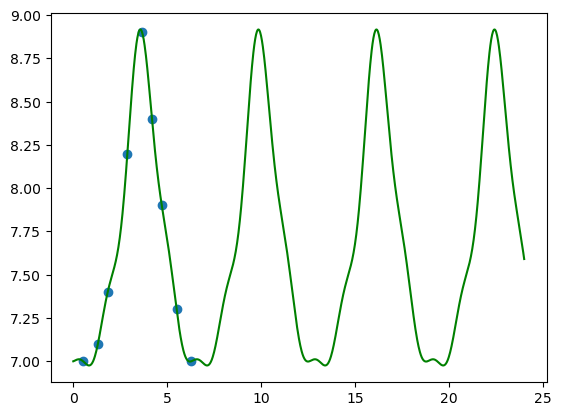

In [37]:
def poly_exc1(x, sol):
    poly = sol[0]
    for i in range(1, sol.size):
        if (i % 2 != 0):
            poly += (sol[i] * np.cos((math.floor(i / 2) + 1) * x))
        else:
            poly += (sol[i] * np.sin(i / 2 * x))
    return poly

x_axis = np.linspace(0, 24, 1000)
plt.scatter(t_changed, pH)
plt.plot(x_axis, poly_exc1(x_axis, sol), color = 'green')
plt.show()

## Задача 2

Дадени са данни за усвояването на лекарство от организма. В таблицата е дадена концентрацията на лекарството в кръвта, като функция на времето:

|  t, h  |  0 | 2 | 4 | 6 | 8 | 
| --- | --- | --- | --- | --- | --- |
| концентрация (в промили) |  0.1 | 0.009 | 0.0011 | 0.00003 | 0.0000012 | 


Да се намери обобщен полином, който интерполира данните. За целта да се избере подходящ базис измежду следните:

1. $\{1, e^x, e^{2x}, \dots, e^{nx} \}$
2. $\frac{1}{1+x}, \frac{1}{2+x}, \dots, \frac{1}{n+x}$
3. $\{1, e^{-x}, e^{-2x}, \dots, e^{-nx} \}$
4. $\frac{1}{1-x}, \frac{1}{2-x}, \dots, \frac{1}{n-x}$

Обосонвете избора си, като обясните кой от изброените базиси е подходящ и защо останалите не са.

In [43]:
#Тъй като от таблицата може да видим,
#че данните много бързо намаляват, 
#то най-подходящ базис би бил 3.
#Това е защото по принцип при 
#експоненционално бързо нарастващи данни
#сме говорили, че най-подходящ базис би бил 1., 
#то тогава при експоненционално намаляващи 
#данни, ще изберем 3.

In [53]:
#using 3. {1, e^{-x}, e^{-2x}, ..., e^{-nx}}
t = np.array([0, 2, 4, 6, 8])
concentrat = np.array([0.1, 0.009, 0.0011, 0.00003, 0.0000012])
n = t.size

In [61]:
A = np.zeros([n,n])
def fill_exponen_matrix(A, n, t):
    for i in range(n):
        for j in range(n):
            A[i][j] = np.exp(j * t[i] * (-1))

fill_exponen_matrix(A, n, t)

In [63]:
sol = np.linalg.solve(A, concentrat)
sol

array([-4.18801338e-07,  3.63871064e-03,  3.54665603e+00, -2.57985924e+01,
        2.23482981e+01])

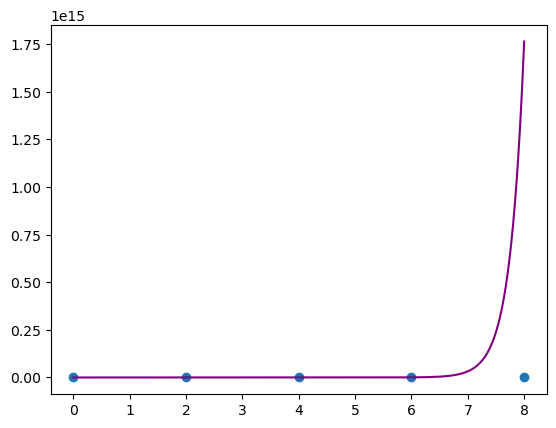

In [79]:
def poly_exc2(sol, x):
    poly = 0
    for i in range(sol.size):
        poly += (sol[i] * np.exp(x * i))
    return poly

x_axis = np.linspace(0, 8, 1000)
poly = poly_exc2(sol, x_axis)
plt.scatter(t, concentrat)
plt.plot(x_axis, poly, color = 'purple')
plt.show()

##  Задача 3

In [ ]:
def tk(x, n, t):
    res = 1
    for i in rangle(n):
        res *= (np.sin((x - t[i]) / 2) / np.sin((t[k] - t[i])/ 2))
    return res

Може да се покаже, че функциите
$$
\tau_k(x)=\prod_{i=0,i\neq k}^n{\frac{\sin\frac{x-x_i}{2}}{\sin\frac{x_k-x_i}{2}}}
$$
образуват интерполационен базис за пространството от тригонометрични полиноми,
т.е. те са такива тригонометрични полиноми, че 
$$
\tau_k(x_k)=1,~~\tau_k(x_i)=0,i\neq k.
$$ 

Тоагава можем да намерим един тригонометричен полином като използваме формулата на Лагранж с базисни функции функциите $\tau_k(x), k = 0,\dots,n.$

Да се построи интерполационния полином от Задача 1, като се използват горепосочените базисни функции.